# Ordinary Differential equations: Non-Linear Pendulum

In [20]:
#b
import numpy as np
import matplotlib.pyplot as plt

def eulerCromer(rhsFunc, S_0, T_0, tf, dt):
    
    t = np.arange(t_0, tf, dt)
    S = np.zeros((len(t), len(S_0)))
    
    S[0] = S_0
    for i in range(1, len(t)):
        dSdt = rhsFunc(S[i - 1], t[i - 1])
        S[i, 1] = S[i - 1, 1] + dt * dSdt[1]
        S[i, 0] = S[i -1, 0] + dt * S[i, 1]
        
    return t, S

Enter initial angular displacement (in radians): 2
Enter initial angular velocity (in rad/s): 2
Enter timestep (dt): 2


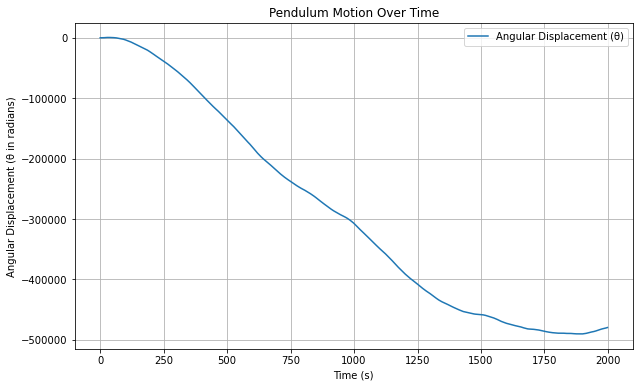

In [21]:
#c
def eulerMethod(rhsFunc, S_0, T_0, tf, dt):
       
    t = np.arange(t_0, tf, dt)
    S = np.zeros((len(t), len(S_0)))
    
    S[0] = S_0
    for i in range(1, len(t)):
        dSdt = rhsFunc(S[i - 1], t[i - 1])
        S[i] = S[i -1] + dt * dSdt
        
    return t, S

g = 9.81
L = 1.0

theta_0 = float(input("Enter initial angular displacement (in radians): "))
omega_0 = float(input("Enter initial angular velocity (in rad/s): "))
dt = float(input("Enter timestep (dt): "))
t_0 = 0 
tf = dt * 1000

def pendulum_rhs(S, t):
    theta, omega = S
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return np.array([dtheta_dt, domega_dt])

S_0 = np.array([theta_0, omega_0])
t, S = eulerMethod(pendulum_rhs, S_0, t_0, tf, dt)

plt.figure(figsize=(10, 6))
plt.plot(t, S[:, 0], label='Angular Displacement (θ)')
plt.title('Pendulum Motion Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (θ in radians)')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
#d

def verletMethod(rhsFunc, S_0, t_0, tf, dt):
    t = np.arange(t_0, tf, dt)
    S = np.zeros((len(t), len(S_0)))

    S[0] = S_0
    dSdt = rhsFunc(S[0], t[0])
    S[1, 1] = S[0, 1] + dt * dSdt[1] 
    S[1, 0] = S[0, 0] + dt * S[0, 1]

    for i in range(2, len(t)):
        dSdt = rhsFunc(S[i - 1], t[i - 1])
        S[i, 0] = 2 * S[i - 1, 0] - S[i - 2, 0] + dt**2 * dSdt[1]
        S[i, 1] = (S[i, 0] - S[i - 2, 0]) / (2 * dt)

    return t, S

Which method? Euler=1, Euler-Cromer=2, Verlet=3: 3
Using Verlet Method


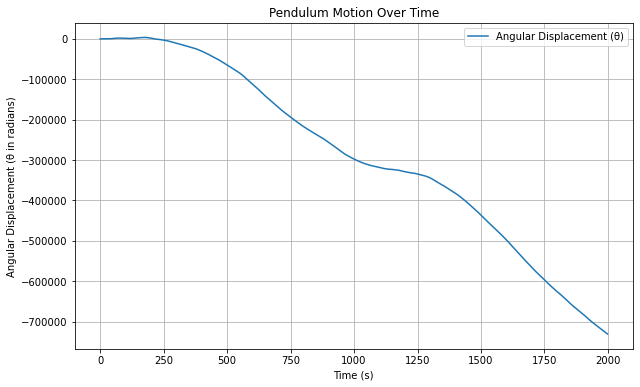

In [23]:
flag = int(input("Which method? Euler=1, Euler-Cromer=2, Verlet=3: "))

if flag == 1:
    print("Using Euler Method")
    t, S = eulerMethod(pendulum_rhs, S_0, t_0, tf, dt)
elif flag == 2:
    print("Using Euler-Cromer Method")
    t, S = eulerCromer(pendulum_rhs, S_0, t_0, tf, dt)
else:
    print("Using Verlet Method")
    t, S = verletMethod(pendulum_rhs, S_0, t_0, tf, dt) #Verlet Method seems to work the best

plt.figure(figsize=(10, 6))
plt.plot(t, S[:, 0], label='Angular Displacement (θ)')
plt.title('Pendulum Motion Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (θ in radians)')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
#e
def periodEstimate(t, omega):
    zeroCrossings = []

    for i in range(1, len(omega)):
        if omega[i-1] > 0 and omega[i] <= 0:
            frac = -omega[i-1] / (omega[i] - omega[i-1])
            zero_crossing_time = t[i-1] + frac * (t[i] - t[i-1])
            zeroCrossings.append(zero_crossing_time)

    periods = [zeroCrossings[i] - zeroCrossings[i-1] for i in range(1, len(zeroCrossings))]

    if periods:
        averagePeriod = sum(periods) / len(periods)
        return averagePeriod
    else:
        return None

periodEstimated = periodEstimate(t, S[:, 1])

if periodEstimated is not None:
    print(f"Estimated Period of the Pendulum: {periodEstimated:.4f} seconds")
else:
    print("Period estimation failed. Ensure the pendulum oscillates within the simulation time.")


Estimated Period of the Pendulum: 44.3613 seconds


In [28]:
#f
from scipy.integrate import quad

def integrand(theta, theta_0):
    return 1 / np.sqrt(np.cos(theta) - np.cos(theta_0))

def theoreticalPeriod(theta_0, L=1.0, g=9.81):
    integral, _ = quad(integrand, 0, theta_0, args=(theta_0,))
    T = 4 * np.sqrt(L / (2 * g)) * integral
    return T
    
for theta_0 in theta_0_radians:
    # Simulation to estimate period
    S_0 = np.array([theta_0, 0]) 
    t, S = eulerCromer(pendulum_rhs, S_0, t_0, tf, dt)
    periodEstimated = periodEstimate(t, S[:, 1])

    theoreticalT = theoreticalPeriod(theta_0, L, g)

    print(f"Initial angle {np.degrees(theta_0):.1f}°:")
    print(f"  Estimated Period: {periodEstimated:.4f} s")
    print(f"  Theoretical Period: {theoreticalT:.4f} s\n")


Initial angle 10.0°:
  Estimated Period: 108.0617 s
  Theoretical Period: 2.0099 s

Initial angle 30.0°:
  Estimated Period: 340.0690 s
  Theoretical Period: 2.0410 s

Initial angle 45.0°:
  Estimated Period: 47.9784 s
  Theoretical Period: 2.0863 s

